# MCMC Approach to Travelling Salesman Problem

---

Author: Agosh Saini 
Contact: Agosh.Saini@Gamil.com
Website: agoshsaini.com

Link to Paper Used: https://www.webpages.uidaho.edu/~stevel/565/literature/tsp.pdf

---

Importing The Modules Rquired For This Project

In [1]:
# Importing
import numpy as np
import matplotlib.pyplot as plt

The following function calculates the distance between two points

In [2]:
def distance(cord1, cord2):
    x = cord2[0] - cord1[0]
    y = cord2[1] - cord1[1]
    return np.sqrt(np.sum(np.power((x, y), 2)))

The following function allows you to calculate total distance based on a given route

In [3]:
def total_distance(route):
    path = 0
    
    # making the for loop circular using mod (%)
    for i in range(len(route)): 
        path += distance(route[i],  route[(i+1) % len(route)])
    
    return path

The algorithm used is called Metropolis. This method is a Monte Carlo Markov Chain (MCMC) approach to estimate global minimas. The assumption is that as iterations (n) approaches infinity, we will get closer and closer to the most efficient route.

Below, the function determines which route is better in terms of distance, and even if a route is not the best, sometimes its better to accept unfavourable route to prevent getting stuck in local mimimas

In [4]:
def route_acceptance(route_1, route_2, KbT):
    
    # determine if second route is worse than first
    
    del_energy =  total_distance(route_2) - total_distance(route_1)
    
    if del_energy < 0 or np.random.random_sample() < np.exp(-del_energy/KbT) > np.random.random_sample():
        
        return route_2
    else:
        
        return route_1    

Lastly, the MCMC method function can be found below, This function just repeats the process for n interations

In [5]:
def travelling_salesman(route, n_iter, KbT=1.0):
    
    for _ in range(n_iter):
    
        # making a copy of the route
        changed_route = np.copy(route)

        # chose two points to switch by picking random index and switching them
        index_1, index_2 = np.random.choice(len(route), size=2, replace=False)
        changed_route[index_1] = route[index_2]
        changed_route[index_2] = route[index_1]
        
        # calculate if the switch is favorable or not
        preffered_route = route_acceptance(route, changed_route, KbT=KbT)
    
        total_path = total_distance(preffered_route)
        
    return preffered_route, total_path

Testing the method below, lets say the points are the following

In [6]:
pos = np.array([[0,0], [1,1], [2,2], [3,3], [4,4], [5,5], [6,6], [6,5], [6,4], [5,4], [4,3], [5,2], [3,2], [2,1]])
print(f'distance: {total_distance(pos)}')
print(f'brute force iterations: {np.math.factorial(len(pos))}')

distance: 19.96399003885765
brute force iterations: 87178291200


This would look like this on a map

Text(0.5, 1.0, 'Position of cities')

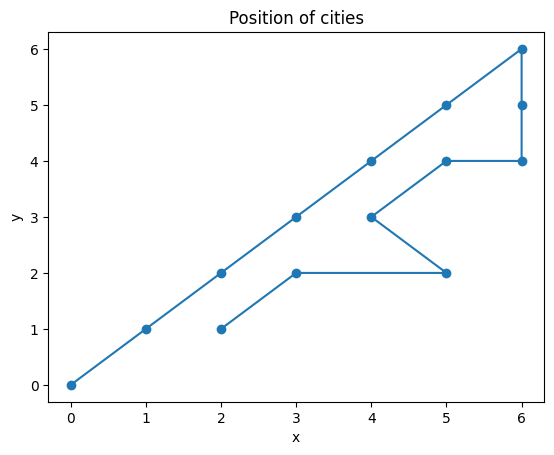

In [7]:
x, y = zip(*pos)
plt.plot(x, y, '-o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Position of cities')

Lets randomize this sequence and put it through, for this example we can tell what the best path will be, so it is a good starting point

In [8]:
route = np.random.default_rng().permutation(pos)

print(f'route: {route}')
print(f'distance: {total_distance(route)}')

route: [[6 4]
 [2 1]
 [6 5]
 [1 1]
 [5 5]
 [2 2]
 [6 6]
 [5 4]
 [0 0]
 [3 3]
 [5 2]
 [4 3]
 [3 2]
 [4 4]]
distance: 54.79872365482696


Putting the array through the function we created. Lets say KbT = 10 and n_iter = 1000

In [9]:
route_optimized, path_distance = travelling_salesman(route, 1000, KbT=10)

getting the route data

In [10]:
print(f'route: {route_optimized}')
print(f'distance: {path_distance}')

route: [[6 4]
 [2 1]
 [6 5]
 [1 1]
 [5 5]
 [2 2]
 [6 6]
 [5 4]
 [0 0]
 [3 3]
 [3 2]
 [4 3]
 [5 2]
 [4 4]]
distance: 53.56265567732717


Lets repeat with higher iterations and see what we get

In [11]:
route_optimized, path_distance = travelling_salesman(route, 1000, KbT=10)
print(f'route: {route_optimized}')
print(f'distance: {path_distance}')

route: [[6 4]
 [2 1]
 [6 5]
 [1 1]
 [5 5]
 [2 2]
 [6 6]
 [5 4]
 [0 0]
 [5 2]
 [3 3]
 [4 3]
 [3 2]
 [4 4]]
distance: 55.527034212469076


Repeating with a smaller KbT

In [12]:
route_optimized, path_distance = travelling_salesman(route, 1000, KbT=0.1)
print(f'route: {route_optimized}')
print(f'distance: {path_distance}')

route: [[6 4]
 [2 1]
 [6 5]
 [1 1]
 [5 5]
 [2 2]
 [6 6]
 [5 4]
 [4 3]
 [3 3]
 [5 2]
 [0 0]
 [3 2]
 [4 4]]
distance: 52.72946125050022


And Repeating with higher number of iterations and lower KbT

In [13]:
route_optimized, path_distance = travelling_salesman(route, 1000, KbT=1)
print(f'route: {route_optimized}')
print(f'distance: {path_distance}')

route: [[6 4]
 [2 1]
 [6 5]
 [1 1]
 [5 5]
 [2 2]
 [4 4]
 [5 4]
 [0 0]
 [3 3]
 [5 2]
 [4 3]
 [3 2]
 [6 6]]
distance: 53.49816057508119


As we can see that the KbT controls how often the values will be conditionally rearranged. Picking the right KbT requires experimentation of the system with known solutions, like the example seen in this file. The n-iterations should be optimized so that once the equilibrium point has been reached, the system stops after certain iterations. 

One problem that is apparent in the examples above is that the program is prone to getting stuck in local minimas. To get the system to explore entire space, lets modify the code

In [15]:
pathways = 4
pathways_array = np.zeros((4, len(route), 2))
distance_pathways = np.zeros(pathways)
i = 0

while i < pathways:

    # running the optimization
    route_optimized, path_distance = travelling_salesman(route, 1000, KbT=0.1)
    
    # storing path
    pathways_array[i] = route_optimized
    
    # randomizing and exploring a different starting configuration
    route = np.random.default_rng().permutation(pos)
    i += 1
    
for j in range(pathways):
    distance_pathways[j] = total_distance(pathways_array[j])

print(f'best route distance:{min(distance_pathways)}')
print(f'best route: {pathways_array[np.argmin(distance_pathways)]}')

best route distance:38.044512993713454
best route: [[2. 1.]
 [6. 4.]
 [5. 5.]
 [1. 1.]
 [5. 2.]
 [4. 3.]
 [2. 2.]
 [0. 0.]
 [3. 3.]
 [5. 4.]
 [6. 5.]
 [6. 6.]
 [4. 4.]
 [3. 2.]]


The method above explores 4 pathways and gives best result from those 4, more pathways can be added to explore even more of the solution space